In [1]:
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

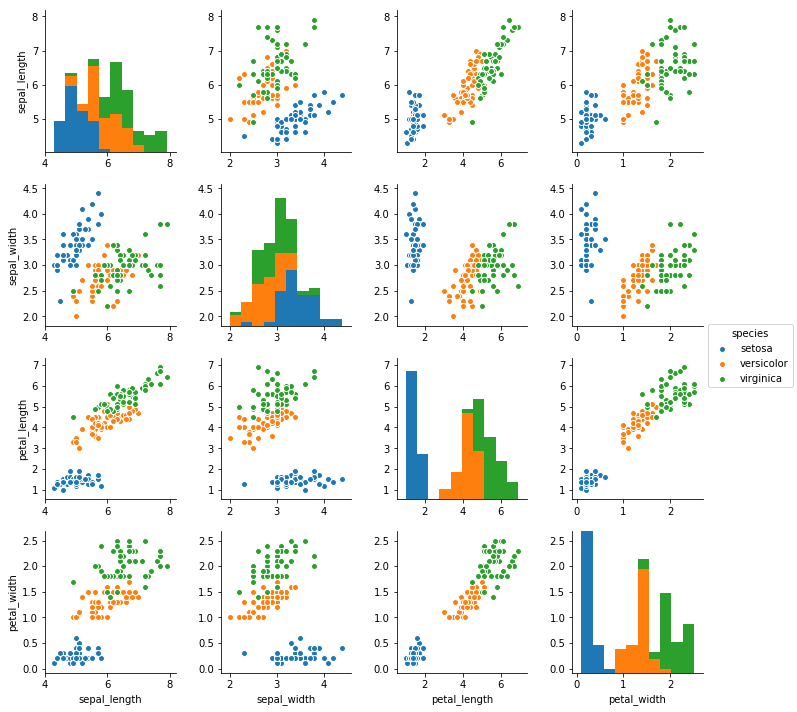

In [7]:
sns.pairplot(iris,hue='species')

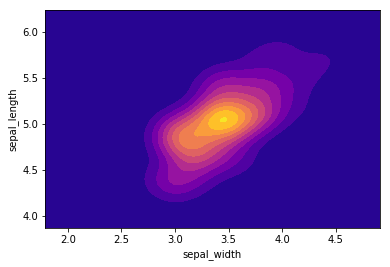

In [12]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot(setosa['sepal_width'],setosa['sepal_length'],cmap='plasma',shade=True)

In [13]:
from sklearn.cross_validation import train_test_split

In [14]:
X = iris.drop('species',axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
from sklearn.svm import SVC

In [16]:
model = SVC()

In [17]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
pred = model.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       1.00      1.00      1.00        20
  virginica       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        45



In [22]:
from sklearn.grid_search import GridSearchCV

In [23]:
pgrid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

In [24]:
grid = GridSearchCV(SVC(),pgrid,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................................... C=0.1, gamma=1 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................................... C=0.1, gamma=1 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................................... C=0.1, gamma=1 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [25]:
grid_pred = grid.predict(X_test)

In [26]:
print(confusion_matrix(y_test,grid_pred))
print(classification_report(y_test,grid_pred))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       1.00      0.95      0.97        20
  virginica       0.92      1.00      0.96        12

avg / total       0.98      0.98      0.98        45

